In [14]:
import math as m
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import time
from scipy.linalg import eigh
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import eigs
import matplotlib as ml
import matplotlib.pyplot as pp
%matplotlib inline

In [15]:
n = 50
h = 1.0 / n
eps = 0.0001

In [16]:
def MakeUnitSparseMatrix(erow, edata, n):
     for i in range(n**2):
        erow.append(i)
        edata.append(1)
            
            
def MakeSparseMatrix(row, col, data, n):
     for i in range(n**2):
        for j in range(n**2):
            if i == j:
                a = 4  
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            if j == i + 1 and i % n == 0:
                a = -2
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif j == i - 1 and i % n == n - 1:
                a = -2
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif (j == i - 1 or j == i + 1) and not ((i % n == n - 1 and j == i + 1) or (i % n == 0 and j == i - 1)):
                a = -1
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif i in list(range(0, n)) and j == i + n:
                a = -2 
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif i in list(range(n**2 - n, n**2)) and j == i - n:
                a = -2
                row.append(i)
                col.append(j)
                data.append(a)
                continue
            elif (j == i - n or j == i + n):
                a = -1 
                row.append(i)
                col.append(j)
                data.append(a)
                continue
                

def SetF(f, n):
    x = np.linspace(0.0, 1.0, num=n, endpoint=False)
    y = np.linspace(0.0, 1.0, num=n, endpoint=False)
    for i in range(n):
        for j in range(n):
            f[i * n + j] = m.cos(m.pi * x[i] * 6) * m.cos(m.pi * y[j] * 3) / n**2
            
def aijReturn(row, col, data, i, j):
    n = len(row)
    for k in range(n):
        if row[k] == i and col[k] == j:
            return data[k]
    return 0

In [17]:
def showsol(sol, n):
    pp.imshow(sol.reshape((n, n)),cmap=ml.cm.Blues,interpolation='none',origin='lower')
    
def SetMatrix(A, n):
#     print(list(range(0, n)) + list(range(n, 2* n)) + list(range(n**2 - 2 * n, n**2 - n)) + list(range(n**2 - n, n**2)))
    for i in range(n**2):
        for j in range(n**2):
            if i == j:
                A[i][j] = 4  
            if j == i + 1 and i % n == 0:
                A[i][j] = -2
            elif j == i - 1 and i % n == n - 1:
                A[i][j] = -2
            elif (j == i - 1 or j == i + 1) and not ((i % n == n - 1 and j == i + 1) or (i % n == 0 and j == i - 1)):
                A[i][j] = -1
            elif i in list(range(0, n)) and j == i + n:
                A[i][j] = -2 
            elif i in list(range(n**2 - n, n**2)) and j == i - n:
                A[i][j] = -2
            elif (j == i - n or j == i + n):
                A[i][j] = -1 
#             if i % n == n - 1 and j == i + 1:
#                 A[i][j] = 0
#             if i % n == 0 and j == i - 1:
#                 A[i][j] = 0
                
def SetF(f, n):
    x = np.linspace(0.0, 1.0, num=n, endpoint=False)
    y = np.linspace(0.0, 1.0, num=n, endpoint=False)
    for i in range(n):
        for j in range(n):
            f[i * n + j] = m.cos(m.pi * x[i] * 6) * m.cos(m.pi * y[j] * 3) / n**2
            
def A_val(i, j, n):
    h = 1 #/ n
    a = 0
    if i == j:
        a = 4/h**2   
    if j == i + 1 and i % n == 0:
        a = -2/h**2  
    elif j == i - 1 and i % n == n - 1:
        a = -2/h**2  
    elif j == i - 1 or j == i + 1:
        a = -1/h**2 
    elif i in list(range(0, n)) and j == i + n:
        a = -2/h**2 
    elif i in list(range(n**2 - n, n**2)) and j == i - n:
        a = -2/h**2 
    elif (j == i - n or j == i + n):
        a = -1/h**2 
    if i % n == n - 1 and j == i + 1:
        a = 0
    if i % n == 0 and j == i - 1:
        a = 0
    return a
                
                
                
                
row = []
col = []
data = []

erow = []
edata = []

start_time = time.time()
MakeSparseMatrix(row, col, data, n)
MakeUnitSparseMatrix(erow, edata, n)
print("--- %s seconds ---" % (time.time() - start_time))

A = coo_matrix((data, (row, col)), shape=(n**2, n**2)).toarray()
e = coo_matrix((edata, (erow, erow)), shape=(n**2, n**2)).toarray()
f = np.zeros( n**2 )
SetF(f, n)

x = np.ones( n**2 )
x_next = np.zeros( n**2 )
# SetMatrix(A, n)
# SetF(f, n)

--- 19.282881498336792 seconds ---


Error >>  50.000001531453215
Error >>  0.004273056636162714
Error >>  0.003923966860865621
Error >>  0.003602168716763477
Error >>  0.003306418184364907
Error >>  0.003034894744698702
Error >>  0.002785711727875982
Error >>  0.002557074975333316
Error >>  0.0023473172595103974
Error >>  0.002154901034725434
Error >>  0.0019784124474755142
Error >>  0.0018165528854024663
Error >>  0.001668130087398334
Error >>  0.0015320495338709457
Error >>  0.0014073063717380072
Error >>  0.0012929779470144743
Error >>  0.0011882169436507929
Error >>  0.0010922450972866002
Error >>  0.0010043474417052007
Error >>  0.0009238670433693749
Error >>  0.0008502001807590826
Error >>  0.0007827919281465048
Error >>  0.0007211321069238909
Error >>  0.0006647515711790972
Error >>  0.0006132187976867859
Error >>  0.0005661367537686244
Error >>  0.000523140019548706
Error >>  0.0004838921439873033
Error >>  0.00044808321671576426
Error >>  0.0004154276401080178
Error >>  0.00038566208818562584
Error >>  0.0003585

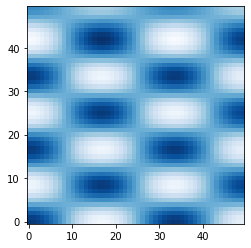

In [18]:
error = LA.norm(x - x_next)
aii = 0
cij = 0
d = 0

i_cur = 0
j_cur = 0
step = -1

start_time = time.time()
iterId = 0

while(error > eps):
    iterId += 1
    for s in range(n):
        for k in range(n):
            step = 0
            x_next[s * n + k] = 0
#             aii = A_val(s * n + k, s * n + k, n)
            aii = A[s * n + k][s * n + k]
            d = f[s * n + k] / aii
            for i in range(n):
                i_cur = i
                for j in range(n):
                    j_cur = j
#                     aij = A_val(s * n + k, i * n + j, n)
                    aij = A[s * n + k][i * n + j]
                    if s * n + k == i * n + j:
                        cij = 0
                    else:
                        cij = (-aij/aii) 
                    x_next[s * n + k] += cij * x_next[i * n + j]
            for i in range(i_cur + 1, n):
                for j in range(j_cur + 1, n):
#                     aij = A_val(s * n + k, i * n + j, n)
                    aij = A[s * n + k][i * n + j]
                    if s * n + k == i * n + j:
                        cij = 0
                    else:
                        cij = (-aij/aii) #sss 
                    x_next[s * n + k] += cij * x[i * n + j]
            x_next[s * n + k] += d
            
    error = LA.norm(x - x_next)
    print("Error >> ", error)
    x = np.copy(x_next)
    
print("--- %s seconds ---" % (time.time() - start_time))
print("|Ax - f| = ", LA.norm(np.dot(A, x) - f))
showsol(x, n)

In [19]:
# row = []
# col = []
# data = []

# erow = []
# edata = []

# start_time = time.time()
# MakeSparseMatrix(row, col, data, n)
# MakeUnitSparseMatrix(erow, edata, n)
# print("--- %s seconds ---" % (time.time() - start_time))

# A = coo_matrix((data, (row, col)), shape=(n**2, n**2)).toarray()
# e = coo_matrix((edata, (erow, erow)), shape=(n**2, n**2)).toarray()
# f = np.zeros( n**2 )
# SetF(f, n)

x = np.ones( n**2 )
x_next = np.zeros( n**2 )
step = 0

w = eigh(A, eigvals_only=True)
M = max(w)
mu = min(w)

tau1 = (M + mu) / 2.0 + ((M - mu) / 2.0) * m.cos(m.pi / (2.0 * n**2))
tau2 = (M + mu) / 2.0 + ((M - mu) / 2.0) * m.cos((m.pi * 3.0) / (2.0 * n**2))

tau1 = 1.0 / tau1
tau2 = 1.0 / tau2

tau =  0.11602541605785077
Error >>  0.0011602541605784452  x_next:
tau =  0.11602551424521035
Error >>  0.0011348751152124375  x_next:
tau =  0.11602541605785077
Error >>  0.0011102885292564183  x_next:
tau =  0.11602551424521035
Error >>  0.0010863868988838018  x_next:
tau =  0.11602541605785077
Error >>  0.001063098096548612  x_next:
tau =  0.11602551424521035
Error >>  0.0010403805532758065  x_next:
tau =  0.11602541605785077
Error >>  0.0010181985047276539  x_next:
tau =  0.11602551424521035
Error >>  0.0009965310451735413  x_next:
tau =  0.11602541605785077
Error >>  0.0009753550664984229  x_next:
tau =  0.11602551424521035
Error >>  0.0009546573432875014  x_next:
tau =  0.11602541605785077
Error >>  0.0009344200230945281  x_next:
tau =  0.11602551424521035
Error >>  0.0009146332205322949  x_next:
tau =  0.11602541605785077
Error >>  0.0008952816991323779  x_next:
tau =  0.11602551424521035
Error >>  0.0008763572779066168  x_next:
tau =  0.11602541605785077
Error >>  0.0008578462

Error >>  0.0001006132008984531  x_next:
tau =  0.11602541605785077
Error >>  9.888143250972418e-05  x_next:
--- 16.329880237579346 seconds ---
|Ax - f| =  0.0008376452899881555


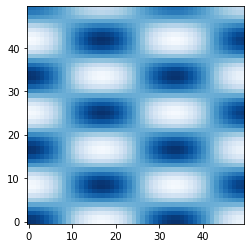

In [20]:
start_time = time.time()
error = LA.norm(x - x_next)

while(error > eps):
    if(step % 2 == 0):
        tau = tau1
    else:
        tau = tau2
    print('tau = ', tau)
    C = e - tau * A
    x_next = np.dot(C, x) + tau * f
    error = LA.norm(x - x_next)
    print("Error >> ", error, " x_next:")
    x = np.copy(x_next)
    step += 1

print("--- %s seconds ---" % (time.time() - start_time))
print("|Ax - f| = ", LA.norm(np.dot(A, x) - f))
showsol(x, n)